In [1]:
import theano
import theano.tensor as T
import numpy as np

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)


In [2]:
from mnist import test_mlp

In [ ]:
# Random Search of hyper parameters
random_state = np.random.RandomState(12355)
log_learning_rate = random_state.uniform(low=-1,high=-5,size=10).astype(np.float32)

learning_rate = 10 ** log_learning_rate

learning_rate_decay = random_state.uniform(low=0.994,high=0.999,size=10).astype(np.float32)
        
momentum = random_state.uniform(low=0.5,high=0.9,size=10).astype(np.float32)

bias_init = random_state.uniform(low=-10,high=-1,size=10).astype(np.float32)

activation = random_state.binomial(1,0.5,size=10).astype(np.int)

In [ ]:
plain_score = []
plain_error = []

highway_score = []
highway_error = []
for i in range(10):
    
    test_score_plain, last_train_error, train_error_plain = test_mlp(learning_rate=learning_rate[i], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=50, highway=False, bias_init = None, 
                                   learning_rate_decay=learning_rate_decay[i], momentum=momentum[i], 
                                    batch_size=20, n_hidden=[71]*10, 
                                   n_hidden_layer=10, verbose=True, activation=activation[i])
    
    print ("####################################################")
    print("iter: %f type: 'plain' loss %f" %(i,last_train_error))
    print ("####################################################")
    
    plain_score.append(last_train_error)
    plain_error.append(train_error_plain)
    
    test_score_high, last_train_error1, train_error_highway = test_mlp(learning_rate=learning_rate[i], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=50, highway=True, bias_init = bias_init[i], 
                                   learning_rate_decay=learning_rate_decay[i], momentum=momentum[i], 
                                    batch_size=20, n_hidden=[50]*10, 
                                   n_hidden_layer=10, verbose=True, activation=activation[i])
    
    highway_score.append(last_train_error1)
    highway_error.append(train_error_highway)
    
    print ("####################################################")
    print("iter: %f type: 'highway' loss %f" %(i,last_train_error1))
    print ("####################################################")

... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.668095  train loss 0.694310  learning_rate 0.000937
     epoch 1, minibatch 2500/2500, test error of best model 16.550000 %
epoch 2, minibatch 2500/2500, validation loss 0.368141  train loss 0.383180  learning_rate 0.000932
     epoch 2, minibatch 2500/2500, test error of best model 9.630000 %
epoch 3, minibatch 2500/2500, validation loss 0.276822  train loss 0.284427  learning_rate 0.000927
     epoch 3, minibatch 2500/2500, test error of best model 7.840000 %
epoch 4, minibatch 2500/2500, validation loss 0.230263  train loss 0.230385  learning_rate 0.000922
     epoch 4, minibatch 2500/2500, test error of best model 6.570000 %
epoch 5, minibatch 2500/2500, validation loss 0.201368  train loss 0.193859  learning_rate 0.000917
     epoch 5, minibatch 2500/2500, test error of best model 6.050000 %
epoch 6, minibatch 2500/2500, validation loss 0.181884  train loss 0.167516  learning_rate 

mnist.py:664: UserWarning: The parameter 'updates' of theano.function() expects an OrderedDict, got <type 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (theano.compat.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  y: train_set_y[index * batch_size: (index + 1) * batch_size]
The code for file __file__ ran for 9.34m


Optimization complete. Best validation score of 11.554261 % obtained at iteration 75000, with test performance 3.330000 %
####################################################
iter: 0.000000 type: 'plain' loss 0.013111
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 1.464778  train loss 1.483958  learning_rate 0.000937
     epoch 1, minibatch 2500/2500, test error of best model 30.780000 %
epoch 2, minibatch 2500/2500, validation loss 0.850498  train loss 0.886249  learning_rate 0.000932
     epoch 2, minibatch 2500/2500, test error of best model 19.360000 %
epoch 3, minibatch 2500/2500, validation loss 0.620427  train loss 0.659455  learning_rate 0.000927
     epoch 3, minibatch 2500/2500, test error of best model 14.750000 %
epoch 4, minibatch 2500/2500, validation loss 0.508301  train loss 0.546505  learning_rate 0.000922
     epoch 4, minibatch 2500/2500, test error of best model


The code for file __file__ ran for 10.85m


Optimization complete. Best validation score of 20.025134 % obtained at iteration 125000, with test performance 5.860000 %
####################################################
iter: 0.000000 type: 'highway' loss 0.204377
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.260352  train loss 0.273472  learning_rate 0.003514
     epoch 1, minibatch 2500/2500, test error of best model 8.560000 %
epoch 2, minibatch 2500/2500, validation loss 0.220450  train loss 0.225931  learning_rate 0.003510
     epoch 2, minibatch 2500/2500, test error of best model 7.140000 %
epoch 3, minibatch 2500/2500, validation loss 0.175936  train loss 0.160042  learning_rate 0.003505
     epoch 3, minibatch 2500/2500, test error of best model 5.450000 %
epoch 4, minibatch 2500/2500, validation loss 0.144143  train loss 0.117971  learning_rate 0.003501
     epoch 4, minibatch 2500/2500, test error of best model


The code for file __file__ ran for 7.48m


Optimization complete. Best validation score of 11.861726 % obtained at iteration 40000, with test performance 2.790000 %
####################################################
iter: 1.000000 type: 'plain' loss 0.003908
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.302384  train loss 0.324670  learning_rate 0.003514
     epoch 1, minibatch 2500/2500, test error of best model 9.450000 %
epoch 2, minibatch 2500/2500, validation loss 0.225462  train loss 0.232773  learning_rate 0.003510
     epoch 2, minibatch 2500/2500, test error of best model 7.410000 %
epoch 3, minibatch 2500/2500, validation loss 0.177441  train loss 0.171230  learning_rate 0.003505
     epoch 3, minibatch 2500/2500, test error of best model 5.720000 %
epoch 4, minibatch 2500/2500, validation loss 0.159357  train loss 0.144199  learning_rate 0.003501
     epoch 4, minibatch 2500/2500, test error of best model 5.


The code for file __file__ ran for 10.66m


Optimization complete. Best validation score of 12.714274 % obtained at iteration 25000, with test performance 3.800000 %
####################################################
iter: 1.000000 type: 'highway' loss 0.001571
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.278027  train loss 2.278419  learning_rate 0.000012
     epoch 1, minibatch 2500/2500, test error of best model 65.270000 %
epoch 2, minibatch 2500/2500, validation loss 2.251536  train loss 2.252303  learning_rate 0.000012
     epoch 2, minibatch 2500/2500, test error of best model 64.350000 %
epoch 3, minibatch 2500/2500, validation loss 2.221146  train loss 2.222273  learning_rate 0.000012
     epoch 3, minibatch 2500/2500, test error of best model 63.340000 %
epoch 4, minibatch 2500/2500, validation loss 2.186502  train loss 2.187996  learning_rate 0.000012
     epoch 4, minibatch 2500/2500, test error of best mod


The code for file __file__ ran for 7.07m


Optimization complete. Best validation score of 82.309783 % obtained at iteration 125000, with test performance 21.450000 %
####################################################
iter: 2.000000 type: 'plain' loss 0.851723
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.294868  train loss 2.295121  learning_rate 0.000012
     epoch 1, minibatch 2500/2500, test error of best model 50.480000 %
epoch 18, minibatch 2500/2500, validation loss 2.154037  train loss 2.158399  learning_rate 0.000012
     epoch 18, minibatch 2500/2500, test error of best model 40.570000 %
epoch 19, minibatch 2500/2500, validation loss 2.144021  train loss 2.148626  learning_rate 0.000012
     epoch 19, minibatch 2500/2500, test error of best model 40.040000 %
epoch 20, minibatch 2500/2500, validation loss 2.133708  train loss 2.138559  learning_rate 0.000012
     epoch 20, minibatch 2500/2500, test error of be


The code for file __file__ ran for 10.62m


Optimization complete. Best validation score of 169.516182 % obtained at iteration 125000, with test performance 33.170000 %
####################################################
iter: 2.000000 type: 'highway' loss 1.708838
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.054694  train loss 2.057826  learning_rate 0.000075
     epoch 1, minibatch 2500/2500, test error of best model 59.190000 %
epoch 2, minibatch 2500/2500, validation loss 1.712581  train loss 1.724358  learning_rate 0.000074
     epoch 2, minibatch 2500/2500, test error of best model 49.930000 %
epoch 3, minibatch 2500/2500, validation loss 1.424868  train loss 1.445925  learning_rate 0.000074
     epoch 3, minibatch 2500/2500, test error of best model 41.610000 %
epoch 4, minibatch 2500/2500, validation loss 1.202119  train loss 1.228415  learning_rate 0.000074
     epoch 4, minibatch 2500/2500, test error of best 


The code for file __file__ ran for 7.02m


Optimization complete. Best validation score of 18.388140 % obtained at iteration 125000, with test performance 5.450000 %
####################################################
iter: 3.000000 type: 'plain' loss 0.166061
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.247217  train loss 2.248998  learning_rate 0.000075
     epoch 1, minibatch 2500/2500, test error of best model 46.900000 %
epoch 2, minibatch 2500/2500, validation loss 2.186670  train loss 2.190201  learning_rate 0.000074
     epoch 2, minibatch 2500/2500, test error of best model 42.280000 %
epoch 3, minibatch 2500/2500, validation loss 2.113186  train loss 2.118520  learning_rate 0.000074
     epoch 3, minibatch 2500/2500, test error of best model 38.580000 %
epoch 4, minibatch 2500/2500, validation loss 2.021512  train loss 2.028775  learning_rate 0.000074
     epoch 4, minibatch 2500/2500, test error of best mode


The code for file __file__ ran for 10.65m


Optimization complete. Best validation score of 42.559186 % obtained at iteration 125000, with test performance 11.110000 %
####################################################
iter: 3.000000 type: 'highway' loss 0.460951
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.220076  train loss 0.230203  learning_rate 0.008913
     epoch 1, minibatch 2500/2500, test error of best model 7.520000 %
epoch 2, minibatch 2500/2500, validation loss 0.157733  train loss 0.143050  learning_rate 0.008877
     epoch 2, minibatch 2500/2500, test error of best model 5.140000 %
epoch 3, minibatch 2500/2500, validation loss 0.147725  train loss 0.122755  learning_rate 0.008840
     epoch 3, minibatch 2500/2500, test error of best model 4.810000 %
epoch 4, minibatch 2500/2500, validation loss 0.147589  train loss 0.102413  learning_rate 0.008804
     epoch 4, minibatch 2500/2500, test error of best mode


The code for file __file__ ran for 6.75m


Optimization complete. Best validation score of 12.717609 % obtained at iteration 25000, with test performance 3.190000 %
####################################################
iter: 4.000000 type: 'plain' loss 0.000170
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.309993  train loss 0.337365  learning_rate 0.008913
     epoch 1, minibatch 2500/2500, test error of best model 9.100000 %
epoch 2, minibatch 2500/2500, validation loss 0.244402  train loss 0.262041  learning_rate 0.008877
     epoch 2, minibatch 2500/2500, test error of best model 7.190000 %
epoch 3, minibatch 2500/2500, validation loss 0.209146  train loss 0.220539  learning_rate 0.008840
     epoch 3, minibatch 2500/2500, test error of best model 6.300000 %
epoch 4, minibatch 2500/2500, validation loss 0.185533  train loss 0.191850  learning_rate 0.008804
     epoch 4, minibatch 2500/2500, test error of best model 5.


The code for file __file__ ran for 10.63m


Optimization complete. Best validation score of 14.831342 % obtained at iteration 37500, with test performance 4.150000 %
####################################################
iter: 5.000000 type: 'highway' loss 0.026200
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.362314  train loss 0.394391  learning_rate 0.043449
     epoch 1, minibatch 2500/2500, test error of best model 10.440000 %
epoch 2, minibatch 2500/2500, validation loss 0.366776  train loss 0.386031  learning_rate 0.043381
epoch 3, minibatch 2500/2500, validation loss 0.280426  train loss 0.282185  learning_rate 0.043314
     epoch 3, minibatch 2500/2500, test error of best model 7.070000 %
epoch 4, minibatch 2500/2500, validation loss 0.275553  train loss 0.258461  learning_rate 0.043247
     epoch 4, minibatch 2500/2500, test error of best model 7.400000 %
epoch 5, minibatch 2500/2500, validation loss 0.253440  tra


The code for file __file__ ran for 6.72m


Optimization complete. Best validation score of 21.156880 % obtained at iteration 17500, with test performance 5.810000 %
####################################################
iter: 6.000000 type: 'plain' loss 1.408866
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.183880  train loss 0.190086  learning_rate 0.043449
     epoch 1, minibatch 2500/2500, test error of best model 5.650000 %
epoch 2, minibatch 2500/2500, validation loss 0.144768  train loss 0.137479  learning_rate 0.043381
     epoch 2, minibatch 2500/2500, test error of best model 4.630000 %
epoch 3, minibatch 2500/2500, validation loss 0.136574  train loss 0.114572  learning_rate 0.043314
     epoch 3, minibatch 2500/2500, test error of best model 4.320000 %
epoch 4, minibatch 2500/2500, validation loss 0.129019  train loss 0.096966  learning_rate 0.043247
     epoch 4, minibatch 2500/2500, test error of best model 3.


The code for file __file__ ran for 10.36m


Optimization complete. Best validation score of 11.891230 % obtained at iteration 15000, with test performance 3.600000 %
####################################################
iter: 6.000000 type: 'highway' loss 0.001451
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.455787  train loss 0.477737  learning_rate 0.048298
     epoch 1, minibatch 2500/2500, test error of best model 12.740000 %
epoch 2, minibatch 2500/2500, validation loss 0.303569  train loss 0.309063  learning_rate 0.048137
     epoch 2, minibatch 2500/2500, test error of best model 7.360000 %
epoch 3, minibatch 2500/2500, validation loss 0.246783  train loss 0.257214  learning_rate 0.047977
     epoch 3, minibatch 2500/2500, test error of best model 8.100000 %
epoch 4, minibatch 2500/2500, validation loss 0.200308  train loss 0.194843  learning_rate 0.047818
     epoch 4, minibatch 2500/2500, test error of best model


The code for file __file__ ran for 7.46m


Optimization complete. Best validation score of 14.658114 % obtained at iteration 40000, with test performance 3.330000 %
####################################################
iter: 7.000000 type: 'plain' loss nan
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.340526  train loss 0.358102  learning_rate 0.048298
     epoch 1, minibatch 2500/2500, test error of best model 10.180000 %
epoch 2, minibatch 2500/2500, validation loss 0.216390  train loss 0.204686  learning_rate 0.048137
     epoch 2, minibatch 2500/2500, test error of best model 7.100000 %
epoch 3, minibatch 2500/2500, validation loss 0.179205  train loss 0.150318  learning_rate 0.047977
     epoch 3, minibatch 2500/2500, test error of best model 5.180000 %
epoch 4, minibatch 2500/2500, validation loss 0.198246  train loss 0.167286  learning_rate 0.047818
epoch 5, minibatch 2500/2500, validation loss 0.152514  train loss


The code for file __file__ ran for 10.63m


Optimization complete. Best validation score of 14.288574 % obtained at iteration 45000, with test performance 3.400000 %
####################################################
iter: 7.000000 type: 'highway' loss 0.019291
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.196839  train loss 0.206787  learning_rate 0.012963
     epoch 1, minibatch 2500/2500, test error of best model 6.500000 %
epoch 2, minibatch 2500/2500, validation loss 0.168764  train loss 0.165117  learning_rate 0.012934
     epoch 2, minibatch 2500/2500, test error of best model 5.660000 %
epoch 3, minibatch 2500/2500, validation loss 0.134269  train loss 0.107358  learning_rate 0.012905
     epoch 3, minibatch 2500/2500, test error of best model 4.210000 %
epoch 4, minibatch 2500/2500, validation loss 0.122979  train loss 0.080781  learning_rate 0.012876
     epoch 4, minibatch 2500/2500, test error of best model 


The code for file __file__ ran for 6.67m


Optimization complete. Best validation score of 11.973166 % obtained at iteration 22500, with test performance 2.960000 %
####################################################
iter: 8.000000 type: 'plain' loss 0.000206
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.279557  train loss 0.303334  learning_rate 0.012963
     epoch 1, minibatch 2500/2500, test error of best model 8.370000 %
epoch 18, minibatch 2500/2500, validation loss 0.099340  train loss 0.056974  learning_rate 0.012473
     epoch 18, minibatch 2500/2500, test error of best model 2.870000 %
epoch 19, minibatch 2500/2500, validation loss 0.098460  train loss 0.054291  learning_rate 0.012445
     epoch 19, minibatch 2500/2500, test error of best model 2.890000 %
epoch 20, minibatch 2500/2500, validation loss 0.097710  train loss 0.051807  learning_rate 0.012417
     epoch 20, minibatch 2500/2500, test error of best mo


The code for file __file__ ran for 10.44m


Optimization complete. Best validation score of 9.506201 % obtained at iteration 72500, with test performance 2.780000 %
####################################################
iter: 8.000000 type: 'highway' loss 0.017628
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 1.317189  train loss 1.341430  learning_rate 0.000095
     epoch 1, minibatch 2500/2500, test error of best model 38.560000 %
epoch 2, minibatch 2500/2500, validation loss 0.801197  train loss 0.829914  learning_rate 0.000094
     epoch 2, minibatch 2500/2500, test error of best model 20.610000 %
epoch 3, minibatch 2500/2500, validation loss 0.556951  train loss 0.578202  learning_rate 0.000094
     epoch 3, minibatch 2500/2500, test error of best model 13.790000 %
epoch 4, minibatch 2500/2500, validation loss 0.428690  train loss 0.445128  learning_rate 0.000094
     epoch 4, minibatch 2500/2500, test error of best mode


The code for file __file__ ran for 7.03m


Optimization complete. Best validation score of 11.880644 % obtained at iteration 125000, with test performance 3.570000 %
####################################################
iter: 9.000000 type: 'plain' loss 0.051644
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.073590  train loss 2.079813  learning_rate 0.000095
     epoch 1, minibatch 2500/2500, test error of best model 36.890000 %
epoch 2, minibatch 2500/2500, validation loss 1.663193  train loss 1.677605  learning_rate 0.000094
     epoch 2, minibatch 2500/2500, test error of best model 32.790000 %
epoch 3, minibatch 2500/2500, validation loss 1.268328  train loss 1.292718  learning_rate 0.000094
     epoch 3, minibatch 2500/2500, test error of best model 28.040000 %
epoch 4, minibatch 2500/2500, validation loss 1.008182  train loss 1.039879  learning_rate 0.000094
     epoch 4, minibatch 2500/2500, test error of best mode


The code for file __file__ ran for 10.57m


Optimization complete. Best validation score of 26.989889 % obtained at iteration 125000, with test performance 7.780000 %
####################################################
iter: 9.000000 type: 'highway' loss 0.288294
####################################################


In [13]:
np.array(highway_score).argmin()

6

In [20]:
np.nanargmin(np.array(plain_score))

4

In [149]:
print "learning rate for highway: %f learning rate for plain: %f \n" %(learning_rate[6],learning_rate[1])
print "learning rate decay for highway: %f learning rate decay for plain: %f \n" %(learning_rate_decay[6],learning_rate_decay[1])
print "momentum for highway: %f momentum for plain: %f \n" %(momentum[6],momentum[1])
print "initial bias for highway: %f \n" %(bias_init[6])
print "activation function for highway: %i activation function for plain: %i \n Note: '1' stands for T.tanh '0 stands' for ReLu" %(activation[6],activation[1])

learning rate for highway: 0.043449 learning rate for plain: 0.003514 

learning rate decay for highway: 0.998451 learning rate decay for plain: 0.998790 

momentum for highway: 0.841839 momentum for plain: 0.789181 

initial bias for highway: -8.241063 

activation function for highway: 1 activation function for plain: 0 
 Note: '1' stands for T.tanh '0 stands' for ReLu


In [27]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [ ]:
test_score_plain, last_train_error, train_error_plain = test_mlp(learning_rate=learning_rate[1], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=400, highway=False, bias_init = None, 
                                   learning_rate_decay=learning_rate_decay[1], momentum=momentum[1], 
                                    batch_size=20, n_hidden=[71]*10, 
                                   n_hidden_layer=10, verbose=True, activation=activation[1])

... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.260352  train loss 0.273472  learning_rate 0.003514
     epoch 1, minibatch 2500/2500, test error of best model 8.560000 %
epoch 2, minibatch 2500/2500, validation loss 0.220450  train loss 0.225931  learning_rate 0.003510
     epoch 2, minibatch 2500/2500, test error of best model 7.140000 %
epoch 3, minibatch 2500/2500, validation loss 0.175936  train loss 0.160042  learning_rate 0.003505
     epoch 3, minibatch 2500/2500, test error of best model 5.450000 %
epoch 4, minibatch 2500/2500, validation loss 0.144143  train loss 0.117971  learning_rate 0.003501
     epoch 4, minibatch 2500/2500, test error of best model 4.560000 %
epoch 5, minibatch 2500/2500, validation loss 0.145417  train loss 0.107348  learning_rate 0.003497
epoch 6, minibatch 2500/2500, validation loss 0.119851  train loss 0.075631  learning_rate 0.003493
     epoch 6, minibatch 2500/2500, test error of best model 3.4

The code for file __file__ ran for 61.38m


In [ ]:
test_score_high, last_train_error1, train_error_highway = test_mlp(learning_rate=learning_rate[6], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=400, highway=True, bias_init = bias_init[6], 
                                   learning_rate_decay=learning_rate_decay[6], momentum=momentum[6], 
                                    batch_size=20, n_hidden=[50]*10, 
                                   n_hidden_layer=10, verbose=True, activation=activation[6])

... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.183880  train loss 0.190086  learning_rate 0.043449
     epoch 1, minibatch 2500/2500, test error of best model 5.650000 %
epoch 2, minibatch 2500/2500, validation loss 0.144768  train loss 0.137479  learning_rate 0.043381
     epoch 2, minibatch 2500/2500, test error of best model 4.630000 %
epoch 3, minibatch 2500/2500, validation loss 0.136574  train loss 0.114572  learning_rate 0.043314
     epoch 3, minibatch 2500/2500, test error of best model 4.320000 %
epoch 4, minibatch 2500/2500, validation loss 0.129019  train loss 0.096966  learning_rate 0.043247
     epoch 4, minibatch 2500/2500, test error of best model 3.960000 %
epoch 5, minibatch 2500/2500, validation loss 0.121137  train loss 0.080034  learning_rate 0.043180
     epoch 5, minibatch 2500/2500, test error of best model 3.700000 %
epoch 6, minibatch 2500/2500, validation loss 0.118912  train loss 0.068916  learning_rate 0

The code for file __file__ ran for 85.94m


In [170]:
plt.ylim(-6,0.5)
plt.yticks([0,-1, -2, -3, -4, -5],
           ('$\mathregular{10^0}$','$\mathregular{10^{-1}}$','$\mathregular{10^{-2}}$','$\mathregular{10^{-3}}$',
            '$\mathregular{10^{-4}}$','$\mathregular{10^{-5}}$'))

plt.ylabel('Mean Cross Entropy Error')
plt.xlabel('Number of Epochs')
plt.xlim(0, 400)
plt.title('Depth 10')

plt.plot(np.log10(train_error_plain), label = 'plain')
plt.plot(np.log10(train_error_highway), label = 'highway')
plt.legend()
plt.show()

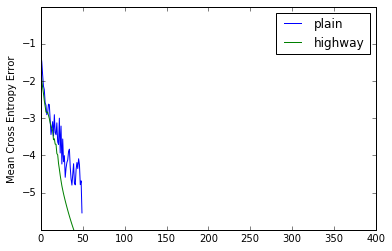

In [147]:
plt.ylim(-6,0)
plt.yticks([-1, -2, -3, -4, -5])
plt.ylabel('Mean Cross Entropy Error')
plt.xlim(0, 400)

plt.plot(np.log(plain_error[1]), label = 'plain')
plt.plot(np.log(highway_error[6]), label = 'highway')
plt.legend()

In [116]:
np.array(plain_error)[1].min()

0.0039076349

In [148]:
np.array(plain_error)[4].min()

0.00017045281

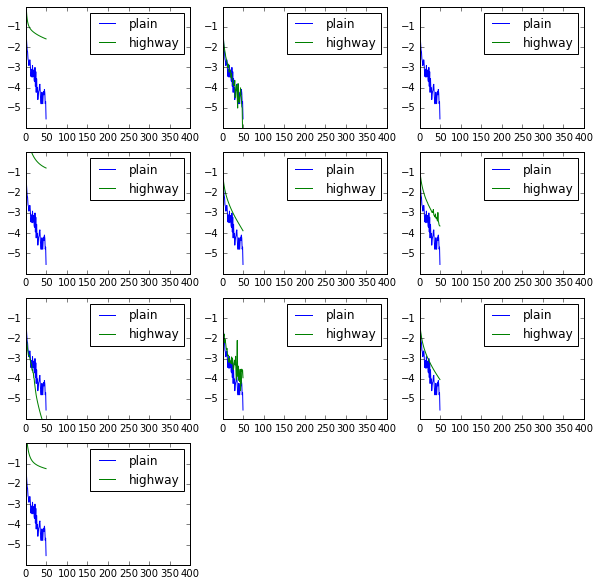

In [146]:
#plt.ylim(0.00001,0.1)
#plt.yticks([0.00001, 0.0001, 0.001, 0.01, 0.1])
#plt.xlim(0, 400)

fig = plt.figure(figsize=(10,10))

for i in range(10):
    ax = fig.add_subplot(4,3,i+1)
    ax.plot(np.log(plain_error[1]), label = 'plain')
    ax.plot(np.log(highway_error[i]),label = 'highway')
    plt.ylim(-6,0)
    plt.yticks([-1, -2, -3, -4, -5])
    plt.xlim(0, 400)
    plt.legend()